$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

## Modeling a single voxel

In [1]:
%matplotlib inline

Earlier – Voxel time courses – we were looking at a single voxel
time course.

Let’s get that same voxel time course back again:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
# Only show 6 decimals when printing
np.set_printoptions(precision=6)

We load the data, and knock off the first four volumes to remove the artefact
we discovered in First go at brain activation exercise:

In [3]:
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_data()
data = data[..., 4:]

The voxel coordinate (3D coordinate) that we were looking at in
Voxel time courses was at (42, 32, 19):

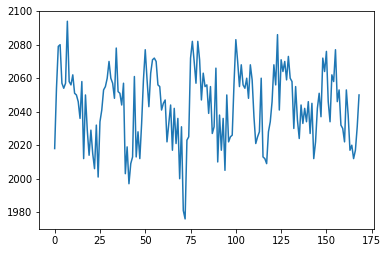

In [4]:
voxel_time_course = data[42, 32, 19]
plt.plot(voxel_time_course)

Now we are going to use the convolved regressor from
Convolving with the hemodyamic response function to do a simple regression on this voxel time
course.

If you don’t have it already, you will need to download
`ds114_sub009_t2r1_conv.txt`.

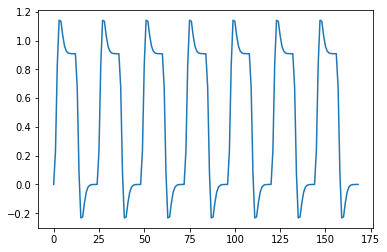

In [5]:
convolved = np.loadtxt('ds114_sub009_t2r1_conv.txt')
# Knock off first 4 elements to match data
convolved = convolved[4:]
plt.plot(convolved)

First we make our *design matrix*.  It has a column for the convolved
regressor, and a column of ones:

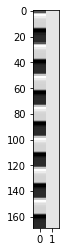

In [6]:
N = len(convolved)
X = np.ones((N, 2))
X[:, 0] = convolved
plt.imshow(X, interpolation='nearest', cmap='gray', aspect=0.1)

$\newcommand{\yvec}{\vec{y}}$
$\newcommand{\xvec}{\vec{x}}$
$\newcommand{\evec}{\vec{\varepsilon}}$
$\newcommand{Xmat}{\boldsymbol X} \newcommand{\bvec}{\vec{\beta}}$
$\newcommand{\bhat}{\hat{\bvec}} \newcommand{\yhat}{\hat{\yvec}}$

As you will remember from the [introduction to the General Linear Model](https://matthew-brett.github.io/teaching/glm_intro.html), our
model is:

$$
\yvec = \Xmat \bvec + \evec
$$

We can get our least squares parameter *estimates* for $\bvec$ with:

$$
\bhat = \Xmat^+y
$$

where $\Xmat^+$ is the *pseudoinverse* of $\Xmat$.  When $\Xmat$ is
invertible, the pseudoinverse is given by:

$$
\Xmat^+ = (\Xmat^T \Xmat)^{-1} \Xmat^T
$$

Let’s calculate the pseudoinverse for our design:

In [7]:
import numpy.linalg as npl
Xp = npl.pinv(X)
Xp.shape

(2, 169)

We calculate $\bhat$:

In [8]:
beta_hat = Xp.dot(voxel_time_course)
beta_hat

array([   31.185514,  2029.367689])

We can then calculate $\yhat$ (also called the *fitted data*):

41405.5743509


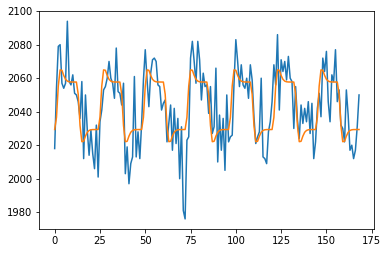

In [9]:
y_hat = X.dot(beta_hat)
e_vec = voxel_time_course - y_hat
print(np.sum(e_vec ** 2))
plt.plot(voxel_time_course)
plt.plot(y_hat)

<!-- vim:ft=rst -->
<!-- Course -->
<!-- BIC -->
<!-- Python distributions -->
<!-- Version control -->
<!-- Editors -->
<!-- Python and common libraries -->
<!-- IPython -->
<!-- Virtualenv and helpers -->
<!-- Pypi and packaging -->
<!-- Mac development -->
<!-- Windows development -->
<!-- Nipy and friends -->
<!-- FMRI datasets -->
<!-- Languages -->
<!-- Imaging software -->
<!-- Installation -->
<!-- Tutorials -->
<!-- MB tutorials -->
<!-- Ideas -->
<!-- Psych-214 -->
<!-- People -->
<!-- Licenses -->
<!-- Neuroimaging stuff -->
<!-- OpenFMRI projects -->
<!-- Unix -->
<!-- Substitutions -->